In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

# 1. Reading and understanding dataset

In [2]:
telecom = pd.read_csv("telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
telecom.shape

(99999, 226)

In [4]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [5]:
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

As the info() function does not notify us of the columns with missing values, they must be identified in a different manner.

In [6]:
#Missing value percentage

telecom_null_cols = round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame("null (%)").sort_values("null (%)", ascending = False)
telecom_null_cols

,null (%)
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [7]:
type(telecom_null_cols)

pandas.core.frame.DataFrame

Columns with more than 30% null values will not be useful for the analysis, so they must be removed.

In [8]:
high_null_cols = list(telecom_null_cols[telecom_null_cols['null (%)']>30].index)
high_null_cols

['arpu_3g_6',
 'night_pck_user_6',
 'total_rech_data_6',
 'arpu_2g_6',
 'max_rech_data_6',
 'fb_user_6',
 'av_rech_amt_data_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'fb_user_7',
 'max_rech_data_7',
 'night_pck_user_7',
 'count_rech_2g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'total_rech_data_9',
 'count_rech_3g_9',
 'fb_user_9',
 'max_rech_data_9',
 'arpu_3g_9',
 'date_of_last_rech_data_9',
 'night_pck_user_9',
 'arpu_2g_9',
 'count_rech_2g_9',
 'av_rech_amt_data_9',
 'total_rech_data_8',
 'arpu_3g_8',
 'fb_user_8',
 'night_pck_user_8',
 'av_rech_amt_data_8',
 'max_rech_data_8',
 'count_rech_3g_8',
 'arpu_2g_8',
 'count_rech_2g_8',
 'date_of_last_rech_data_8']

In [9]:
telecom = telecom.drop(high_null_cols, axis = 1)

In [10]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,0,0,0,0,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,0,0,0,0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,0,0,0,0,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0,0,0,0,1526,0.0,0.0,0.00,0.00


In [11]:
telecom.shape

(99999, 186)

We can drop the date and circle_id columns as they are not required.

In [12]:
#Identifying and removing date columns

date_cols = [i for i in telecom.columns.to_list() if 'date' in i]
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [13]:
telecom = telecom.drop(date_cols, axis = 1)

In [14]:
#Removing circle_id

telecom = telecom.drop('circle_id', axis = 1)

In [15]:
telecom.shape

(99999, 177)

To isolate the high-value customers, we must create a new variable, i.e. the average of the recharge amount in the 6th and 7th months and find the customers recharging above its 70th percentile.

In [16]:
#Recharge column names
rech_cols = [k for k in telecom.columns.tolist() if "rech" in k]
rech_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9']

In [17]:
#Creating a new average recharge amount column

telecom['avg_rech'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'])/2
threshold = telecom['avg_rech'].quantile(0.7)
threshold

368.5

In [18]:
#Filtering high-value customer

telecom = telecom[telecom['avg_rech'] >= threshold]
telecom.shape

(30011, 178)

### Handling missing values

In [19]:
#Finding and removing rows with more than 50% null values and removing them

high_null_rows = telecom[(telecom.isnull().sum(axis=1)/len(telecom.columns)) > 0.5]
telecom = telecom.drop(high_null_rows.index)
telecom.shape

(29897, 178)

In [20]:
#Rechecking missing values

telecom_null_cols = round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame("null (%)").sort_values("null (%)", ascending = False)
telecom_null_cols

,null (%)
loc_ic_mou_9,5.32
og_others_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2m_mou_9,5.32
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00


**Customers with null values in the combined minutes of usage columns for every month must be removed from the original telecom dataframe for us to perform further analysis. Below, we have removed these customers for each month in the descending order of null values.**

***Month 9***

In [21]:
#Creating a mou_9 null value column list

cols_to_check = list(telecom_null_cols[telecom_null_cols['null (%)'] == 5.32].index)
cols_to_check

['loc_ic_mou_9',
 'og_others_9',
 'loc_og_t2t_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'std_ic_t2m_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'roam_og_mou_9',
 'std_ic_t2o_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'spl_og_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_mou_9',
 'onnet_mou_9',
 'spl_ic_mou_9',
 'ic_others_9',
 'isd_ic_mou_9',
 'loc_ic_t2f_mou_9',
 'offnet_mou_9',
 'loc_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'roam_ic_mou_9']

In [22]:
#Creating a dataframe of customers with mou_9 null values

telecom_null_mou_9 = telecom[telecom[cols_to_check].isnull().all(axis=1)]
telecom_null_mou_9.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,...,0,0,0,0,502,0.00,0.00,0.00,0.0,380.0
111,7001300706,0.0,0.0,0.0,596.301,146.073,0.000,0.0,55.19,3.26,...,1,0,0,0,332,0.00,0.00,0.00,0.0,441.0
143,7000106299,0.0,0.0,0.0,695.609,39.981,0.000,0.0,1325.91,28.61,...,0,0,0,0,264,0.00,0.00,0.00,0.0,418.0
188,7000340381,0.0,0.0,0.0,734.641,183.668,0.000,0.0,4.38,0.98,...,0,0,0,0,244,0.00,831.48,1223.04,0.0,492.0


In [23]:
telecom_null_mou_9.shape

(1590, 178)

In [24]:
#Dropping these customers from the original telecom dataframe

telecom = telecom.drop(telecom_null_mou_9.index)

In [25]:
#Rechecking missing values

telecom_null_cols = round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame("null (%)").sort_values("null (%)", ascending = False)
telecom_null_cols

,null (%)
isd_og_mou_8,0.55
roam_ic_mou_8,0.55
loc_og_mou_8,0.55
std_ic_t2o_mou_8,0.55
roam_og_mou_8,0.55
...,...
total_og_mou_9,0.00
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00


***Month 8***

In [26]:
#Creating a mou_8 null value column list

cols_to_check = list(telecom_null_cols[telecom_null_cols['null (%)'] == 0.55].index)

#Creating a dataframe of customers with mou_8 null values

telecom_null_mou_8 = telecom[telecom[cols_to_check].isnull().all(axis=1)]

#Dropping these customers from the original telecom dataframe

telecom = telecom.drop(telecom_null_mou_8.index)

In [27]:
#Rechecking missing values

telecom_null_cols = round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame("null (%)").sort_values("null (%)", ascending = False)
telecom_null_cols

,null (%)
roam_ic_mou_6,0.44
spl_og_mou_6,0.44
og_others_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2m_mou_6,0.44
...,...
isd_og_mou_9,0.00
isd_og_mou_8,0.00
std_og_mou_9,0.00
std_og_mou_8,0.00


***Month 6***

In [28]:
#Creating a mou_6 null value column list

cols_to_check = list(telecom_null_cols[telecom_null_cols['null (%)'] == 0.44].index)

#Creating a dataframe of customers with mou_6 null values

telecom_null_mou_6 = telecom[telecom[cols_to_check].isnull().all(axis=1)]

#Dropping these customers from the original telecom dataframe

telecom = telecom.drop(telecom_null_mou_6.index)

In [29]:
#Rechecking missing values

telecom_null_cols = round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame("null (%)").sort_values("null (%)", ascending = False)
telecom_null_cols

,null (%)
loc_ic_t2f_mou_7,0.12
isd_ic_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12
...,...
spl_og_mou_6,0.00
spl_og_mou_8,0.00
spl_og_mou_9,0.00
og_others_6,0.00


***Month 7***

In [30]:
#Creating a mou_7 null value column list

cols_to_check = list(telecom_null_cols[telecom_null_cols['null (%)'] == 0.12].index)

#Creating a dataframe of customers with mou_7 null values

telecom_null_mou_7 = telecom[telecom[cols_to_check].isnull().all(axis=1)]

#Dropping these customers from the original telecom dataframe

telecom = telecom.drop(telecom_null_mou_7.index)

In [31]:
#Rechecking missing values

telecom_null_cols = round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame("null (%)").sort_values("null (%)", ascending = False)
telecom_null_cols

,null (%)
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0
isd_og_mou_6,0.0


Now, we can check the final telecom dataframe shape.

In [32]:
telecom.shape

(27991, 178)

We still remain with sufficient datapoints to perform our analysis.

### - Churner Tagging

We can now create a new column `churn` with binary (1/0) values; 1 correspnds to those customers who have (i) not placed a single incoming/outgoing call and (ii) not used mobile data in the churn phase.

In [33]:
telecom['churn'] = np.where((telecom['total_ic_mou_9']==0) & (telecom['total_og_mou_9']==0) & (telecom['vol_2g_mb_9']==0) & (telecom['vol_3g_mb_9']==0), 1, 0)

In [34]:
telecom.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,...,0,0,0,720,0.00,0.00,0.00,0.0,640.0,0


In [35]:
#Checking for churn rate

churn_rate = np.mean(telecom['churn'])*100
churn_rate

3.39037547783216

A 3.39% churn rate indicates highly imbalanced data, which we will take care of later.

We must remove all attributes corresponding to the churn phase, i.e. those with '_9' in the column name.

In [36]:
#Finding september columns

september_cols = [i for i in telecom.columns.tolist() if '_9' in i]
september_cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [37]:
#Removing september columns

telecom = telecom.drop(september_cols, axis = 1)

# 2. EDA

Let us begin by checking for multicollinearity among the idependent variables.

In [38]:
#Creating column list for each month

jun_cols = [i for i in telecom.columns.tolist() if '_6' in i]
jul_cols = [i for i in telecom.columns.tolist() if '_7' in i]
aug_cols = [i for i in telecom.columns.tolist() if '_8' in i]

In [39]:
#Checking for highly correlated independent variables
telecom_corr = telecom.corr()
telecom_corr.loc[:,:] = np.tril(telecom_corr, k=-1)
telecom_corr = telecom_corr.stack()
telecom_corr
high_corr = telecom_corr[(telecom_corr > 0.85) | (telecom_corr < -0.85)].sort_values(ascending=False)
high_corr

isd_og_mou_8      isd_og_mou_7        0.959074
isd_og_mou_7      isd_og_mou_6        0.953032
total_rech_amt_8  arpu_8              0.952265
isd_og_mou_8      isd_og_mou_6        0.951881
total_rech_amt_6  arpu_6              0.939355
total_rech_amt_7  arpu_7              0.936163
avg_rech          total_rech_amt_7    0.911467
                  arpu_7              0.907303
                  total_rech_amt_6    0.902498
total_ic_mou_6    loc_ic_mou_6        0.894872
avg_rech          arpu_6              0.892572
total_ic_mou_8    loc_ic_mou_8        0.887034
total_ic_mou_7    loc_ic_mou_7        0.881085
std_og_t2t_mou_8  onnet_mou_8         0.852670
dtype: float64

In [40]:
#Creating a list of highly correlated independent variables and removing them

cols_to_drop=['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','total_ic_mou_6',
            'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_8']
telecom = telecom.drop(cols_to_drop, axis=1)

In [41]:
telecom.shape

(27991, 130)

## 2.1 Deriving new variables and data visualization

Using the age on network (aon) data, we can derive the tenure and plot it against churn.

In [42]:
telecom['tenure'] = (telecom['aon']/30).round(0)

#Dropping aon
telecom = telecom.drop('aon',axis=1)

<AxesSubplot:xlabel='tenure', ylabel='Density'>

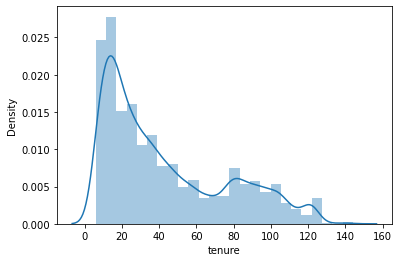

In [43]:
#Tenure distribution

sns.distplot(telecom.tenure, bins = 25)

It is clear that most customers tend to stay for shorter durations. Let us create a few ranges of tenures to better understand the trend.

In [44]:
t_range = [0, 6, 12, 24, 60, 61]
labels = [ '0-6 Months', '6-12 Months', '1-2 Years', '2-5 Years', 'Above 5 Years']
telecom['tenure_range'] = pd.cut(telecom['tenure'], t_range, labels=labels)
telecom['tenure_range'].head()

8     6-12 Months
13            NaN
16      1-2 Years
17      1-2 Years
21      1-2 Years
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Years' < '2-5 Years' < 'Above 5 Years']

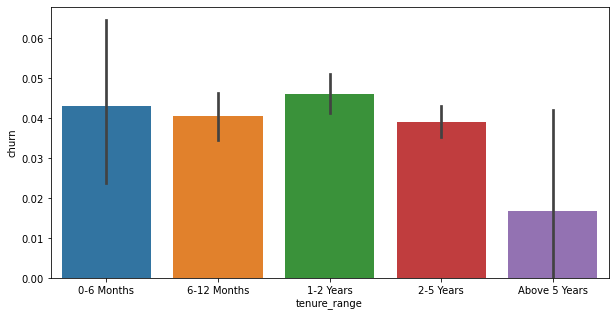

In [45]:
#Tenure range barplot

plt.figure(figsize=[10,5])
sns.barplot(x='tenure_range',y='churn', data=telecom)

plt.show()

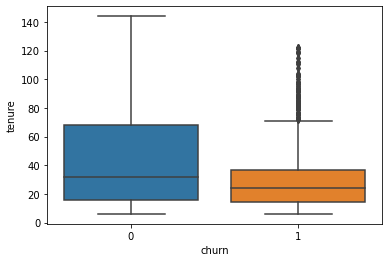

In [46]:
#Tenure vs.churn boxplot

sns.boxplot(y=telecom.tenure,x=telecom.churn)
plt.show()

The churn rate largely decreases for customers staying for longer tenures.

Let us now create a new variable taking the mean of the average revenue per user (arpu) in the months 6 and 7, i.e. good phase.

In [47]:
#Creating new variable

telecom['mean_arpu_6_7'] = (telecom['arpu_6']+telecom['arpu_7'])/2

#Dropping old variables

telecom = telecom.drop(['arpu_6','arpu_7'], axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

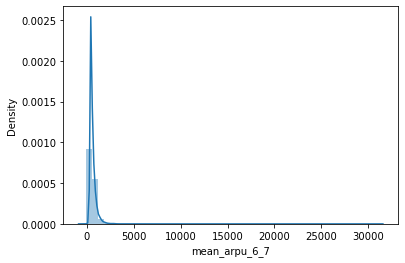

In [48]:
#Plotting the new variable

sns.distplot(telecom['mean_arpu_6_7'])
plt.show

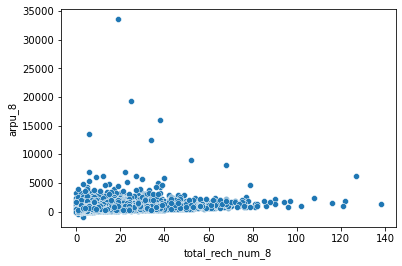

In [49]:
#Checking correlation between the number of recharges and arpu for the latter half of the action phase

sns.scatterplot(data = telecom, x = 'total_rech_num_8', y='arpu_8')
plt.show()

More recharges have been made for smaller amounts.

In [50]:
#Removing unwanted columns before ML model training

telecom = telecom.drop(['mobile_number','tenure_range', 'tenure','sep_vbc_3g'], axis=1)

# 3. Model Training and Fitting

In [51]:
#Defining X and y

X = telecom.drop('churn', axis = 1)
y = telecom['churn']

In [52]:
#Train-test splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [53]:
print(X_train.shape, X_test.shape)

(19593, 125) (8398, 125)


## 3.1 Data Imbalance Handling

Let us employ the SMOTE method for handling the data imbalance

In [54]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)

In [55]:
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
print(X_train_smote.shape, y_train_smote.shape)

(37864, 125) (37864,)


## 3.2 Feature Scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler
 
#Instantiating

scaler = MinMaxScaler()

#Fitting and transforming train set

X_train_smote = scaler.fit_transform(X_train_smote)

In [57]:
X_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)

In [58]:
#Fitting test set

X_test = scaler.transform(X_test)

## 3.3 Logistic Regression with RFE

In [59]:
import statsmodels.api as sm

#Instantiating and adding a constant

logreg = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote)), family = sm.families.Binomial())

In [60]:
logreg = logreg.fit()
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37864
Model:                            GLM   Df Residuals:                    37747
Model Family:                Binomial   Df Model:                          116
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 12 Feb 2024   Deviance:                       3694.5
Time:                        16:45:45   Pearson chi2:                 1.42e+05
No. Iterations:                    54   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.323e+06   3.36e+08      0.013      0.990   -6.53e+08    6.62e+08
loc_og_t2o_mou        -0.0007      0.080     -0.008      0.993      -0.157       0.155
std_og_t2o_mou        -0.0002      0.023     -0.009      0.993      -0.046       0.046
loc_ic_t2o_mou      9.901e-05      0.012      0.009      0.993      -0.023       0.023
arpu_8                -0.4475      6.080     -0.074      0.941     -12.364      11.469
onnet_mou_6          137.9781    110.391      1.250      0.211     -78.384     354.340
onnet_mou_7           82.5572     67.044      1.231      0.218     -48.848     213.962
onnet_mou_8         -174.4429    109.381     -1.595      0.111    -388.826      39.941
offnet_mou_6         168.2976    131.636      1.279      0.201     -89.704     426.299
offnet_mou_7         105.7631     78.778      1.343      0.179     -48.639     260.165
offnet_mou_8        -248.3103    142.212     -1.746      0.081    -527.040      30.420
roam_ic_mou_6          2.1836      1.365      1.600      0.110      -0.491       4.858
roam_ic_mou_7          2.7648      1.840      1.503      0.133      -0.841       6.371
roam_ic_mou_8          2.1782      2.108      1.033      0.302      -1.954       6.310
roam_og_mou_6        -45.5825     36.791     -1.239      0.215    -117.692      26.527
roam_og_mou_7        -18.5195     15.317     -1.209      0.227     -48.540      11.501
roam_og_mou_8         61.2415     35.542      1.723      0.085      -8.419     130.902
loc_og_t2t_mou_6   -3.058e+04   5.42e+04     -0.564      0.573   -1.37e+05    7.57e+04
loc_og_t2t_mou_7    3.762e+04   6.21e+04      0.606      0.545   -8.42e+04    1.59e+05
loc_og_t2t_mou_8    4.064e+05   1.07e+05      3.809      0.000    1.97e+05    6.16e+05
loc_og_t2m_mou_6   -2.249e+04   3.99e+04     -0.564      0.573   -1.01e+05    5.57e+04
loc_og_t2m_mou_7    1.924e+04   3.18e+04      0.605      0.545   -4.31e+04    8.15e+04
loc_og_t2m_mou_8     1.71e+05   4.49e+04      3.809      0.000     8.3e+04    2.59e+05
loc_og_t2f_mou_6   -3215.0488   5705.101     -0.564      0.573   -1.44e+04    7966.744
loc_og_t2f_mou_7    4136.6764   6846.203      0.604      0.546   -9281.634    1.76e+04
loc_og_t2f_mou_8    2.224e+04   5838.680      3.809      0.000    1.08e+04    3.37e+04
loc_og_t2c_mou_6       2.7858      2.352      1.184      0.236      -1.824       7.396
loc_og_t2c_mou_7      -2.1100      3.816     -0.553      0.580      -9.589       5.369
loc_og_t2c_mou_8       4.6250      3.712      1.246      0.213      -2.650      11.900
loc_og_mou_6        5.583e+04   1.09e+05      0.510      0.610   -1.59e+05     2.7e+05
loc_og_mou_7       -3.905e+04   6.44e+04     -0.606      0.545   -1.65e+05    8.72e+04
loc_og_mou_8       -4.163e+05    1.1e+05     -3.800      0.000   -6.31e+05   -2.02e+05
std_og_t2t_mou_6     2.64e+04   6.48e+

In [61]:
#Performing feature selection

from sklearn.linear_model import LogisticRegression
logreg_sk = LogisticRegression()

In [62]:
#Using RFE to choose initial 15 features

from sklearn.feature_selection import RFE

#Instantiating

rfe = RFE(logreg_sk, n_features_to_select = 15)

#Fitting RFE model

rfe = rfe.fit(X_train_smote,y_train_smote)

In [63]:
#RFE selected columns

rfe_cols = X_train_smote.columns[rfe.support_]
rfe_cols

Index(['roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_8'],
      dtype='object')

#### First model with RFE selected columns

In [64]:
X_train_smote_1 = sm.add_constant(X_train_smote[rfe_cols])

#Instantiating and fitting

logreg_1 = sm.GLM(y_train_smote, X_train_smote_1, family=sm.families.Binomial())
logreg_1 = logreg_1.fit()
logreg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37864
Model:                            GLM   Df Residuals:                    37848
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13206.
Date:                Mon, 12 Feb 2024   Deviance:                       26412.
Time:                        16:46:40   Pearson chi2:                 1.37e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4978
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.2592      0.029     43.496      0.000       1.203       1.316
roam_ic_mou_7         13.4776      0.879     15.327      0.000      11.754      15.201
roam_og_mou_8         14.0518      0.778     18.069      0.000      12.528      15.576
loc_og_t2m_mou_8     -16.6138      1.799     -9.235      0.000     -20.140     -13.088
loc_og_mou_8          -0.6980      2.523     -0.277      0.782      -5.644       4.248
std_og_mou_7          13.4210      0.447     30.013      0.000      12.545      14.297
total_og_mou_8       -19.4264      0.672    -28.896      0.000     -20.744     -18.109
loc_ic_t2m_mou_8      -3.5132      4.389     -0.800      0.423     -12.116       5.090
loc_ic_t2f_mou_8     -28.5155      2.862     -9.964      0.000     -34.124     -22.907
loc_ic_mou_8         -36.7974      3.249    -11.325      0.000     -43.166     -30.429
std_ic_mou_8         -15.7589      1.619     -9.733      0.000     -18.932     -12.585
last_day_rch_amt_8   -21.0934      0.899    -23.457      0.000     -22.856     -19.331
monthly_2g_8         -18.0239      1.016    -17.744      0.000     -20.015     -16.033
sachet_2g_8          -12.6210      0.683    -18.489      0.000     -13.959     -11.283
monthly_3g_6         -10.5916      1.001    -10.585      0.000     -12.553      -8.630
monthly_3g_8         -29.1167      1.896    -15.361      0.000     -32.832     -25.401
======================================================================================
"""

In [65]:
#Checking VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Dataframe selected features and corresponding VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_smote[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[rfe_cols].values, i) for i in range(X_train_smote[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,loc_ic_mou_8,7.53
6,loc_ic_t2m_mou_8,6.81
3,loc_og_mou_8,4.45
2,loc_og_t2m_mou_8,4.14
5,total_og_mou_8,3.62
4,std_og_mou_7,2.34
14,monthly_3g_8,1.66
13,monthly_3g_6,1.63
1,roam_og_mou_8,1.55
10,last_day_rch_amt_8,1.53


As `total_rech_num_8` has a relatively high VIF, let us remove it and retrain the model

In [66]:
rfe_cols_new = list(rfe_cols)
rfe_cols_new.remove('loc_ic_mou_8')
rfe_cols_new

['roam_ic_mou_7',
 'roam_og_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_mou_8',
 'std_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_mou_8',
 'last_day_rch_amt_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_8']

#### Second model with RFE selected columns

In [67]:
#Retraining the model

X_train_smote_2 = sm.add_constant(X_train_smote[rfe_cols_new])

#Instantiating and fitting

logreg_2 = sm.GLM(y_train_smote, X_train_smote_2, family=sm.families.Binomial())
logreg_2 = logreg_2.fit()
logreg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37864
Model:                            GLM   Df Residuals:                    37849
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13298.
Date:                Mon, 12 Feb 2024   Deviance:                       26595.
Time:                        17:34:34   Pearson chi2:                 1.82e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4954
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.2302      0.029     42.824      0.000       1.174       1.286
roam_ic_mou_7         13.2328      0.860     15.395      0.000      11.548      14.918
roam_og_mou_8         14.1497      0.777     18.218      0.000      12.627      15.672
loc_og_t2m_mou_8     -10.5657      2.009     -5.259      0.000     -14.503      -6.628
loc_og_mou_8         -14.1717      3.033     -4.672      0.000     -20.117      -8.226
std_og_mou_7          13.7042      0.448     30.585      0.000      12.826      14.582
total_og_mou_8       -20.0409      0.672    -29.814      0.000     -21.358     -18.723
loc_ic_t2m_mou_8     -47.9905      2.172    -22.094      0.000     -52.248     -43.733
loc_ic_t2f_mou_8     -37.9881      2.734    -13.897      0.000     -43.346     -32.630
std_ic_mou_8         -17.0772      1.623    -10.519      0.000     -20.259     -13.895
last_day_rch_amt_8   -21.2942      0.897    -23.743      0.000     -23.052     -19.536
monthly_2g_8         -18.0294      1.011    -17.830      0.000     -20.011     -16.048
sachet_2g_8          -12.8384      0.685    -18.729      0.000     -14.182     -11.495
monthly_3g_6         -10.5946      0.996    -10.639      0.000     -12.546      -8.643
monthly_3g_8         -29.0927      1.894    -15.364      0.000     -32.804     -25.381
======================================================================================
"""

In [68]:
#Checking VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_smote[rfe_cols_new].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[rfe_cols_new].values, i) for i in range(X_train_smote[rfe_cols_new].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_og_mou_8,4.21
2,loc_og_t2m_mou_8,4.06
5,total_og_mou_8,3.62
4,std_og_mou_7,2.34
6,loc_ic_t2m_mou_8,2.09
13,monthly_3g_8,1.65
12,monthly_3g_6,1.63
1,roam_og_mou_8,1.55
9,last_day_rch_amt_8,1.53
0,roam_ic_mou_7,1.48


Finally, the p-values and VIFs of the selected features are satisfactory, indicating a significant influence on the churn response.

### Let us now check the model performance on the training set

In [69]:
#Predicted y_train values

y_train_smote_pred = logreg_2.predict(X_train_smote_2)

#Creating a dataframe with the atual churn values and the predicted churn probabilities

churn_prob = pd.DataFrame({'churn':y_train_smote.values, 'churn_prob':y_train_smote_pred.values})
churn_prob

,churn,churn_prob
0,0,0.157876
1,0,0.000209
2,0,0.714991
3,0,0.230129
4,0,0.001919
...,...,...
37859,1,0.824274
37860,1,0.565013
37861,1,0.304073
37862,1,0.735427


#### Let us now find the optimal probability cutoff

In [70]:
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    churn_prob[i] = churn_prob['churn_prob'].map(lambda x : 1 if x > i else 0)
    
churn_prob.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.157876,1,1,0,0,0,0,0,0,0,0
1,0,0.000209,1,0,0,0,0,0,0,0,0,0
2,0,0.714991,1,1,1,1,1,1,1,1,0,0
3,0,0.230129,1,1,1,0,0,0,0,0,0,0
4,0,0.001919,1,0,0,0,0,0,0,0,0,0


#### Calculating metrics

In [76]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [71]:
#Creating dataframe of metric values

cutoff = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(churn_prob['churn'], churn_prob[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.757527     0.983678     0.531375
0.2          0.2  0.798304     0.966776     0.629833
0.3          0.3  0.822443     0.945806     0.699081
0.4          0.4  0.838290     0.918286     0.758293
0.5          0.5  0.850544     0.888443     0.812645
0.6          0.6  0.854690     0.843809     0.865572
0.7          0.7  0.844496     0.772026     0.916966
0.8          0.8  0.807654     0.662054     0.953254
0.9          0.9  0.646524     0.314811     0.978238


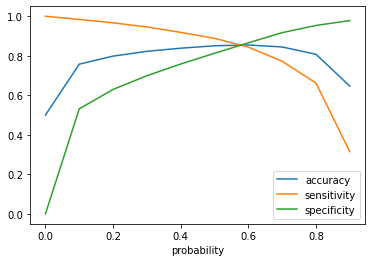

In [72]:
#Plotting the metrics

cutoff.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

At a value of `0.6`, the three metrics intersect, indicating a good balance.

In [73]:
#Adding a new 'predicted' column to the churn_prob dataframe using the optimal probability of 0.6

churn_prob['predicted'] = churn_prob['churn_prob'].map(lambda x: 1 if x > 0.6 else 0)
churn_prob.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.157876,1,1,0,0,0,0,0,0,0,0,0
1,0,0.000209,1,0,0,0,0,0,0,0,0,0,0
2,0,0.714991,1,1,1,1,1,1,1,1,0,0,1
3,0,0.230129,1,1,1,0,0,0,0,0,0,0,0
4,0,0.001919,1,0,0,0,0,0,0,0,0,0,0


#### Calculating sensitivity, specificity, and accuracy using the new confusion matrix

In [74]:
confusion = metrics.confusion_matrix(churn_prob['churn'], churn_prob['predicted'])
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


print(   )


print("Accuracy:-",metrics.accuracy_score(churn_prob['churn'], churn_prob['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[16387  2545]
 [ 2957 15975]]

Accuracy:- 0.8546904711599408
Sensitivity:- 0.8438094231988168
Specificity:- 0.8655715191210649


In [75]:
# ROC Curve function

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

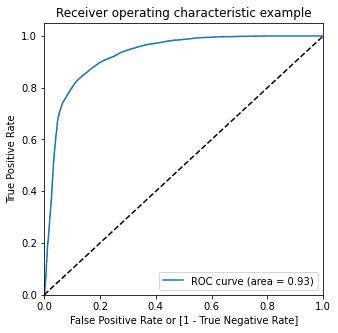

In [76]:
draw_roc(churn_prob['churn'], churn_prob['churn_prob'])

#### Let us now check the model performance on the test set

In [158]:
#Choosing only the RFE selected columns for the test set and predicting for y_test

X_test = pd.DataFrame(X_test, columns = X_train_smote.columns)

X_test_2 = X_test[rfe_cols_new]

X_test_2 = sm.add_constant(X_test_2)

y_test_pred = logreg_2.predict(X_test_2)

In [159]:
churn_prob_test = pd.DataFrame({'churn':y_test.values, 'churn_prob':y_test_pred.values})
churn_prob_test['test_predicted'] = churn_prob_test['churn_prob'].map(lambda x: 1 if x > 0.6 else 0)

In [160]:
churn_prob_test

,churn,churn_prob,test_predicted
0,0,0.033960,0
1,1,0.909709,1
2,0,0.257267,0
3,0,0.002889,0
4,0,0.000011,0
...,...,...,...
8393,0,0.040880,0
8394,0,0.076514,0
8395,0,0.370131,0
8396,0,0.673024,1


#### Metrics computation

In [161]:
confusion = metrics.confusion_matrix(churn_prob_test['churn'], churn_prob_test['test_predicted'])
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


print(   )


print("Accuracy:-",metrics.accuracy_score(churn_prob_test['churn'], churn_prob_test['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[7053 1057]
 [  55  233]]

Accuracy:- 0.8675875208382948
Sensitivity:- 0.8090277777777778
Specificity:- 0.8696670776818742


Comparing the metric values for both the training and test sets, we can see that our model performs quite well!

Now, let us try out a few other types of ML models.

## 3.4 Modeling with PCA

In [59]:
from sklearn.decomposition import PCA

#Instantiating PCA

pca = PCA(random_state = 42)

#Fitting the training set on PCA

pca.fit(X_train_smote)

PCA(random_state=42)

In [60]:
#PCs

pca.components_

array([[-1.56816925e-19, -2.22044605e-16, -1.11022302e-16, ...,
        -3.49582287e-02,  5.93933917e-02,  5.95898442e-02],
       [ 3.61158371e-20,  6.93889390e-17,  2.98372438e-16, ...,
         4.54413266e-02,  5.56329673e-02,  5.57421765e-02],
       [ 2.01884160e-19,  1.66533454e-16,  1.83880688e-16, ...,
        -2.72980420e-02,  1.26513234e-02,  1.24798177e-02],
       ...,
       [ 0.00000000e+00, -2.68457960e-02, -1.70471023e-02, ...,
        -2.60208521e-18,  7.56426172e-15,  9.41087486e-17],
       [-0.00000000e+00,  1.04593645e-02, -4.56153999e-03, ...,
        -2.63461128e-17, -7.85396054e-16, -7.76288755e-17],
       [ 9.99999709e-01,  8.34854306e-05, -7.55081091e-04, ...,
        -2.03287907e-20,  4.12995012e-15,  7.07272511e-20]])

In [61]:
#Checking the cumulative variance of the PCs

cum_var = np.cumsum(pca.explained_variance_ratio_)

In [62]:
cum_var

array([0.20812185, 0.3117922 , 0.39787714, 0.45953166, 0.51182053,
       0.56092982, 0.60167339, 0.63166029, 0.66029236, 0.68417778,
       0.70548515, 0.72297482, 0.73971582, 0.75551415, 0.77032984,
       0.78481604, 0.79672511, 0.80801068, 0.8188729 , 0.82886367,
       0.83741232, 0.84565435, 0.85378525, 0.86090822, 0.86765746,
       0.87397366, 0.88011961, 0.8860689 , 0.8919669 , 0.89751384,
       0.9029056 , 0.90808166, 0.91286397, 0.91744878, 0.92192928,
       0.92577236, 0.92922976, 0.93253648, 0.93577835, 0.93898574,
       0.94210288, 0.94520719, 0.94821934, 0.95108687, 0.95373698,
       0.95623738, 0.95839991, 0.96044933, 0.96248347, 0.96438405,
       0.96624252, 0.96801149, 0.9697668 , 0.97143725, 0.97307822,
       0.97468254, 0.97616841, 0.97752056, 0.97886454, 0.98013481,
       0.9813327 , 0.98250892, 0.98364481, 0.98473354, 0.98576037,
       0.98674609, 0.98766157, 0.98851918, 0.98934966, 0.99017475,
       0.99097436, 0.99170701, 0.99238616, 0.99301761, 0.99363

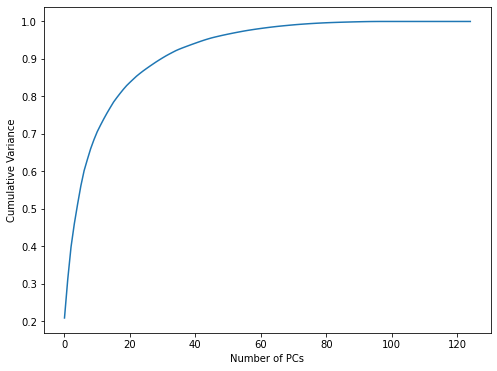

In [63]:
#Scree plot

plt.figure(figsize = (8,6))
plt.plot(cum_var)
plt.xlabel("Number of PCs")
plt.ylabel("Cumulative Variance")
plt.show()

We can see that ~90% of the variance can be described by 60 components. Let us now conduct incremental PCA.

In [64]:
from sklearn.decomposition import IncrementalPCA

#Instantiating PCA with 60 components

inc_pca = IncrementalPCA(n_components = 60)

#Fitting and transforming X_train

X_train_pca = inc_pca.fit_transform(X_train_smote)

In [65]:
#Transforming X_test

X_test_pca = inc_pca.transform(X_test)

## 3.5 Logistic Regression with PCA

In [68]:
#Cross validation libraries

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [210]:
#Creating K-fold object with five splits

folds =  KFold(n_splits = 5, shuffle = True, random_state = 42)

params = {"C": [0.01, 0.1, 1.0, 10, 100, 1000]} #C is the inverse of the logistic regression regularization strength.

#Initiating GridSearchCV with recall as the scoring parameter

cv_model = GridSearchCV(estimator = LogisticRegression(),
                       param_grid = params,
                       scoring = 'recall',
                       cv = folds,
                       verbose = 1,
                       return_train_score = True)

cv_model.fit(X_train_pca, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1.0, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [211]:
#Creating a results dataframe

cv_results = pd.DataFrame(cv_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.076460,0.010991,0.006421,0.001056,0.01,{'C': 0.01},0.883697,0.889451,0.877991,0.892462,...,0.884383,0.005816,5,0.881968,0.884965,0.885782,0.883208,0.885620,0.884309,0.001484
1,0.168927,0.017035,0.006281,0.001130,0.1,{'C': 0.1},0.880284,0.886521,0.873784,0.891671,...,0.881372,0.006887,6,0.880844,0.881276,0.882015,0.879376,0.883047,0.881312,0.001223
2,0.281152,0.006897,0.005806,0.000820,1.0,{'C': 1.0},0.884222,0.886787,0.880884,0.893253,...,0.885646,0.004253,4,0.886200,0.887864,0.885386,0.884859,0.887929,0.886448,0.001258
3,0.496992,0.100725,0.005811,0.000695,10,{'C': 10},0.887635,0.893980,0.884828,0.894307,...,0.890729,0.003807,1,0.891424,0.892081,0.890409,0.888889,0.892150,0.890991,0.001223
4,0.477229,0.041356,0.004871,0.000498,100,{'C': 100},0.887372,0.892381,0.884039,0.895361,...,0.890410,0.004108,3,0.890895,0.891817,0.891070,0.889153,0.891821,0.890951,0.000975


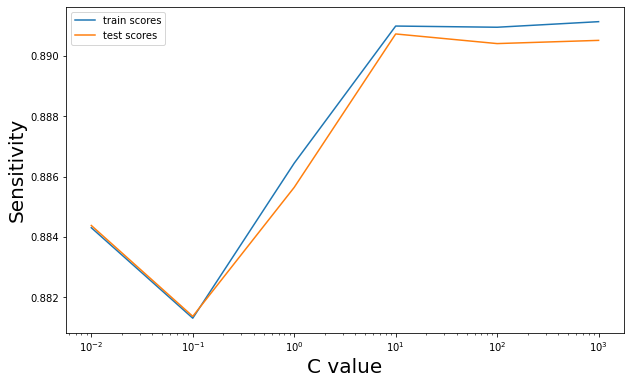

In [212]:
#Plotting C value against training and validation scores

plt.figure(figsize = (10,6))
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.xlabel('C value', fontsize = 20)
plt.ylabel('Sensitivity', fontsize = 20)
plt.legend(['train scores', 'test scores'])
plt.xscale('log')
plt.show()

In [213]:
#Best score

print("Best score = ",cv_model.best_score_)
print("Best C = ", cv_model.best_params_['C'])

Best score =  0.8907287776696281
Best C =  10


#### Optimal logistic regression model

In [214]:
#Instantiating

logreg_pca = LogisticRegression(C=cv_model.best_params_['C'])

#Fitting

logreg_pca = logreg_pca.fit(X_train_pca, y_train_smote)

In [215]:
#X_train predictions

y_train_pred = logreg_pca.predict(X_train_pca)

In [216]:
#Calculcation of metrics

confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


print(   )


# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[15700  3232]
 [ 2048 16884]]

Accuracy:- 0.8605535601098669
Sensitivity:- 0.8918233678428058
Specificity:- 0.829283752376928


#### Let us now check the model performance on the test set

In [226]:
#X_test predictions

y_test_pred = logreg_pca.predict(X_test_pca)

In [227]:
#Calculcation of metrics

confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


print(   )


# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[6808 1302]
 [  50  238]]

Accuracy:- 0.8390092879256966
Sensitivity:- 0.8263888888888888
Specificity:- 0.8394574599260173


### Decision Tree with PCA

In [66]:
from sklearn.tree import DecisionTreeClassifier

#### Hyperparameter tuning

In [69]:
#Parameter grid 
params = {
    'max_depth': range(5, 25, 5),
    'min_samples_leaf': range(50, 300, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiating
dt = DecisionTreeClassifier()

cv_model = GridSearchCV(estimator = dt, 
                           param_grid = params, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

#Fitting to training data
cv_model.fit(X_train_smote,y_train_smote)

#Creating a results dataframe
cv_results = pd.DataFrame(cv_model.cv_results_)
cv_results

Fitting 5 folds for each of 40 candidates, totalling 200 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.110704,0.067556,0.007979,0.001282,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.967776,0.984416,0.974122,0.982308,0.975436,0.976812,0.005980,1
1,1.087468,0.074128,0.008042,0.001793,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.967776,0.984416,0.974122,0.982308,0.975436,0.976812,0.005980,1
2,1.106485,0.080667,0.008217,0.000717,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.966191,0.980718,0.976234,0.979403,0.972266,0.974963,0.005266,3
3,1.065746,0.080554,0.007372,0.000493,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.964871,0.980718,0.975706,0.979403,0.972266,0.974593,0.005689,4
4,1.300837,0.295301,0.008807,0.001435,5,150,50,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.952721,0.966984,0.969105,0.966992,0.963814,0.963923,0.005851,25
5,2.637554,0.966504,0.025115,0.026136,5,150,100,"{'max_depth': 5, 'min_samples_leaf': 150, 'min...",0.952721,0.966984,0.969105,0.966992,0.963814,0.963923,0.005851,25
6,1.719854,0.111594,0.011167,0.002180,5,200,50,"{'max_depth': 5, 'min_samples_leaf': 200, 'min...",0.954834,0.974908,0.973858,0.971217,0.978605,0.970684,0.008273,11
7,1.589861,0.103778,0.010689,0.001449,5,200,100,"{'max_depth': 5, 'min_samples_leaf': 200, 'min...",0.954834,0.974908,0.973858,0.971217,0.978605,0.970684,0.008273,11
8,1.887952,0.262905,0.012156,0.002042,5,250,50,"{'max_depth': 5, 'min_samples_leaf': 250, 'min...",0.946910,0.966719,0.967256,0.969369,0.966719,0.963395,0.008300,27
9,1.548684,0.066046,0.009971,0.000570,5,250,100,"{'max_depth': 5, 'min_samples_leaf': 250, 'min...",0.946910,0.966719,0.967256,0.969369,0.966719,0.963395,0.008300,27


In [71]:
#Best hyperparameter set

cv_model.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)

#### DT Model with best hyperparameters

In [73]:
dt_pca = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

#Fitting for training data

dt_pca.fit(X_train_pca, y_train_smote)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [74]:
# X_train_pca predictions
y_train_pred = dt_pca.predict(X_train_pca)

#### Calculation of metrics

In [77]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print()

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[14801  4131]
 [ 2435 16497]]

Accuracy:- 0.8265899006972321
Sensitivity:- 0.8713817874498204
Specificity:- 0.781798013944644


#### Let us now check the model performance on the test set

In [78]:
#X_test_pca predictions
y_test_pred = dt_pca.predict(X_test_pca)

In [79]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[6332 1778]
 [  72  216]]
Accuracy:- 0.7797094546320552
Sensitivity:- 0.75
Specificity:- 0.7807644882860666


# 4. Model comparisons and recommendations

From all the above models, we have the following metric values:

**(1) Logistic Regression**

***Training scores:***

*Accuracy* = `0.85`;
*Sensitivity* = `0.84`;
*Specificity* = `0.86`

***Test scores:***

*Accuracy* = `0.86`;
*Sensitivity* = `0.80`;
*Sensitivity* = `0.86`

**(2) Logistic Regression with PCA**

***Training scores:***

*Accuracy* = `0.86`;
*Sensitivity* =` 0.89`;
*Sensitivity* = `0.82`

***Test scores:***

*Accuracy* = `0.83`;
*Sensitivity* = `0.82`;
*Sensitivity* = `0.83`

**(3) Decision Tree with PCA**

***Training scores:***

*Accuracy* = `0.82`;
*Sensitivity* =` 0.87`;
*Sensitivity* = `0.78`

***Test scores:***

*Accuracy* = `0.78`;
*Sensitivity* = `0.75`;
*Sensitivity* = `0.78`

Evidently, the logistic regression models, with and without PCA, performed much better than the decision tree, in terms of all the metrics.

## 4.1 Business Recommendations

Some of the top performance predictors, based on the simple and effective logistic regression model are as follows:

| Variables   | Coefficients |
|---------------------|--------------|
|loc_ic_t2m_mou_8|-47.9905|
|loc_ic_t2f_mou_8|-37.9881|
|monthly_3g_8|-29.0927|
|last_day_rch_amt_8|-21.2942	|
|total_og_mou_8|-20.0409|
|monthly_2g_8|-18.0294|
|std_ic_mou_8|-17.0772|
|roam_og_mou_8|14.1497|
|roam_ic_mou_7|13.2328|

The negative coefficients of most top indicators implies an inverse correlation with the churn response, i.e. lower the indicator value, higher the chances of churning. Based on their coefficients, the customers with:

1. reducing local incoming calls
2. reducing monthly 2G and 3G data usage
3. late recharge dates
4. reducing total outgoing minutes
5. reducing incoming STD minutes
6. increasing roaming outgoing minutes

in the month of August (action phase), are the most likely ones to churn. These customers must be especially focused up on and provided value-for-money plans for retention in the future.

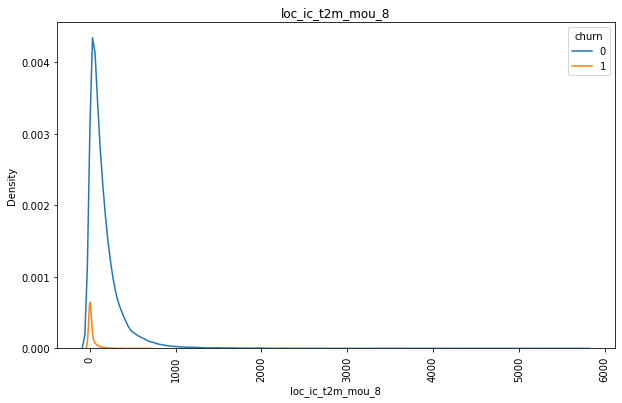

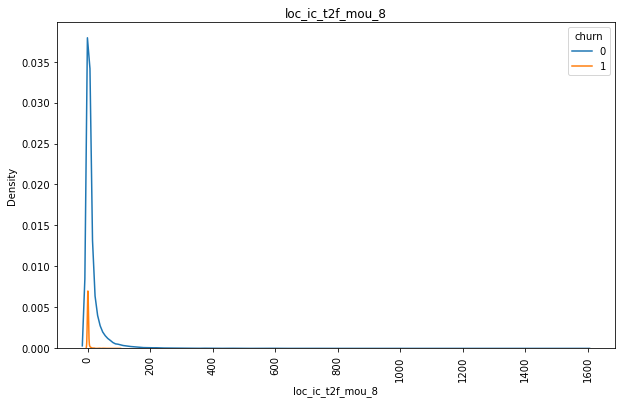

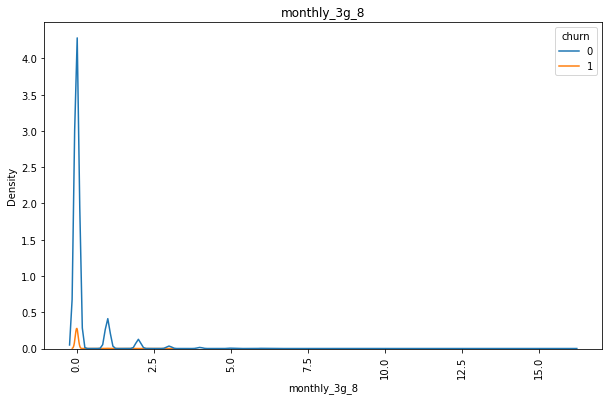

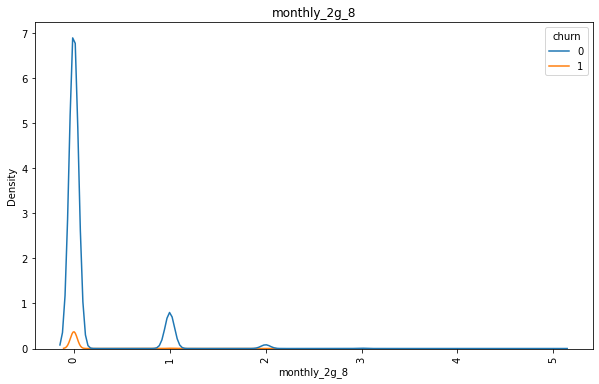

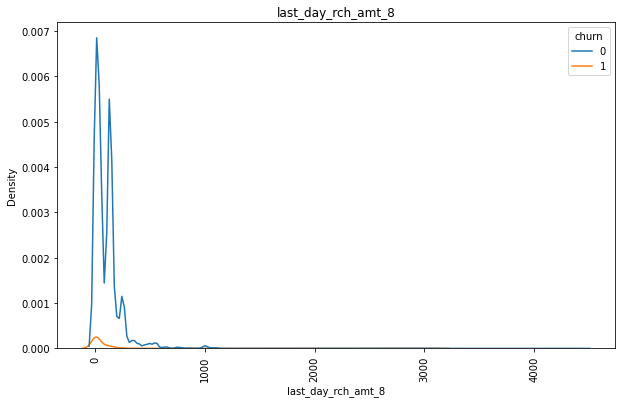

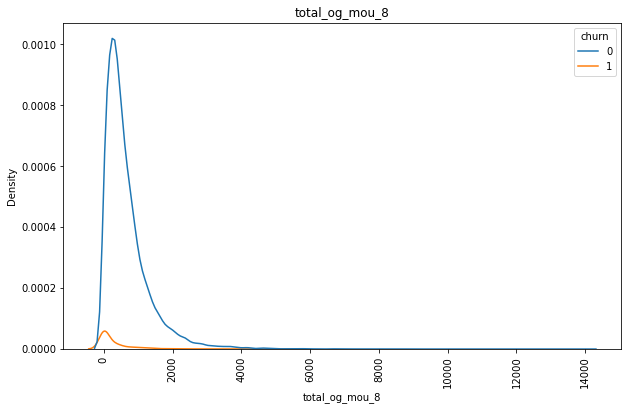

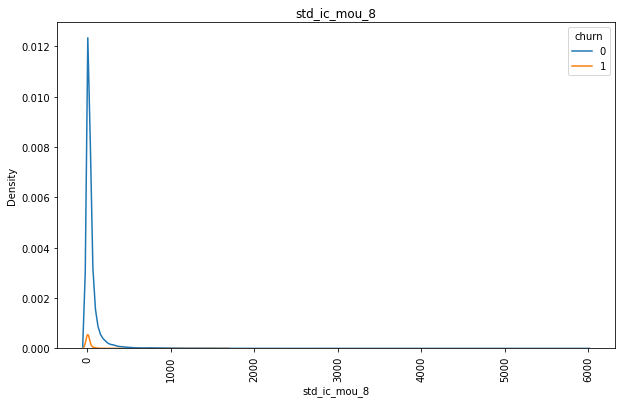

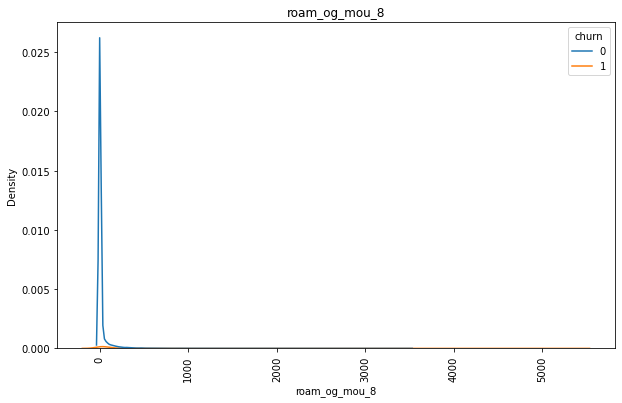

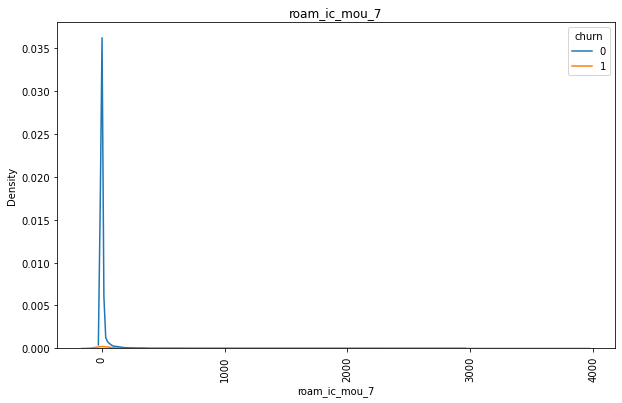

In [88]:
#Plots of top indicators with churn response

top_ind = ['loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','monthly_3g_8','monthly_2g_8','last_day_rch_amt_8','total_og_mou_8','std_ic_mou_8','roam_og_mou_8','roam_ic_mou_7']

for i in top_ind:
    plt.figure(figsize = (10,6))
    sns.kdeplot(data = telecom, x=i, hue='churn',)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()